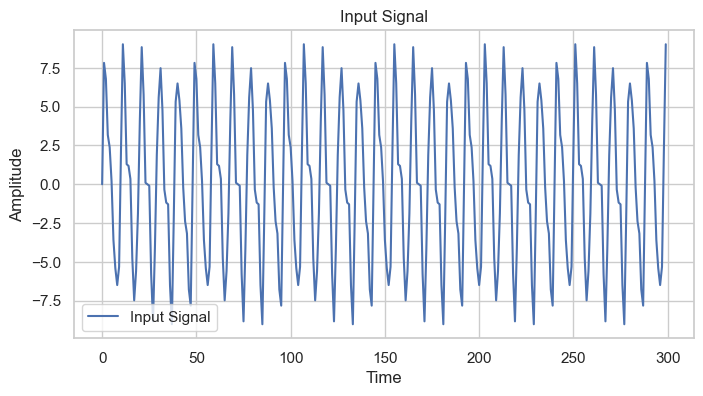

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, label='Input')
    plt.plot(output_array, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Input vs Output')
    plt.legend()
    plt.show()

inputSignal = np.loadtxt('noise.csv', delimiter=',', dtype=float)

plot_graph(inputSignal[:300], title="Input Signal")

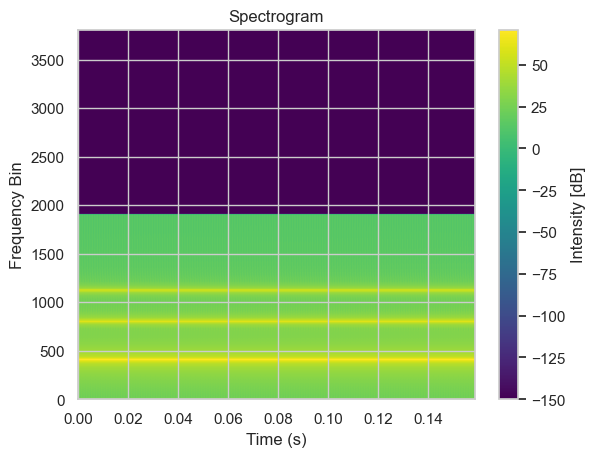

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load spectrogram data from CSV file
data = np.loadtxt('spec1.csv', delimiter=',', dtype=float)

# Extract time and spectrogram data
time = data[:, 0]
spectrogram_data = data[:, 1:]

# Plot spectrogram
plt.imshow(spectrogram_data.T, aspect='auto', origin='lower', cmap='viridis', extent=[time[0], time[-1], 0, len(spectrogram_data)])
plt.colorbar(label='Intensity [dB]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bin')
plt.title('Spectrogram')
plt.show()


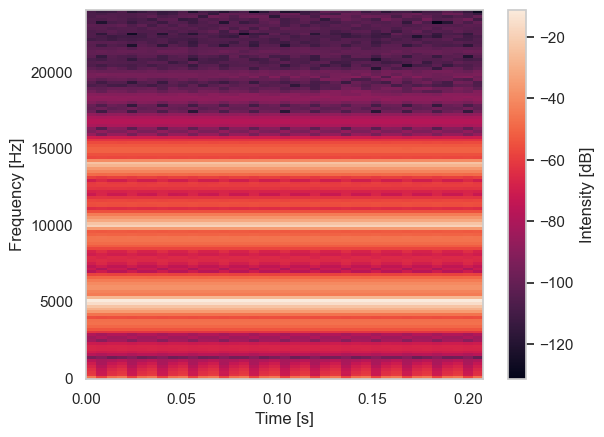

In [3]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Generate spectrogram
nperseg = 256  # Length of each segment
noverlap = 0.1  # Overlap between segments
f, t, Sxx = scipy.signal.spectrogram(inputSignal, fs=48000, nperseg=nperseg, noverlap=noverlap, nfft=256)

# Plot spectrogram
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Convert to dB
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Intensity [dB]')
plt.show()


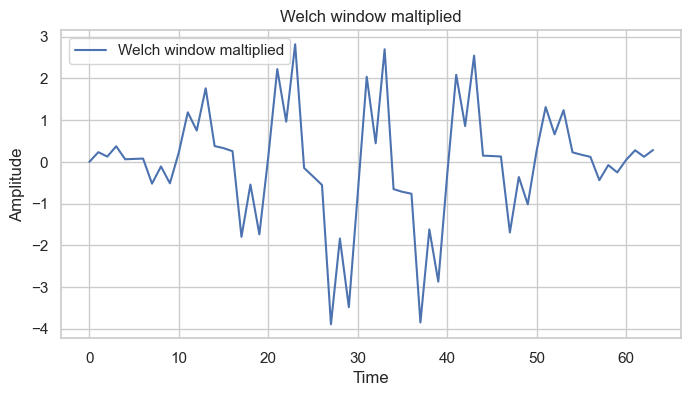

In [4]:
data = [0.000000, 0.232528, 0.126654, 0.374249, 0.062442, 0.070830, 0.078716, -0.522487, -0.110077, -0.514424, 0.228847, 1.188519, 0.751329, 1.764360, 0.378252, 0.329056, 0.256665, -1.797788, -0.544293, -1.738078, 0.130654, 2.223653, 0.963517, 2.820633, -0.146618, -0.349314, -0.555078, -3.894404, -1.838336, -3.483932, -0.750511, 2.040430, 0.445604, 2.700178, -0.654607, -0.719461, -0.763752, -3.852003, -1.619372, -2.873309, -0.295083, 2.088428, 0.859038, 2.547533, 0.148401, 0.139987, 0.128439, -1.693583, -0.363385, -1.017488, 0.279180, 1.315123, 0.660465, 1.239051, 0.228521, 0.170520, 0.120040, -0.438114, -0.077767, -0.252983, 0.048822, 0.277631, 0.122228, 0.283978]
plot_graph(data, title="Welch window maltiplied")

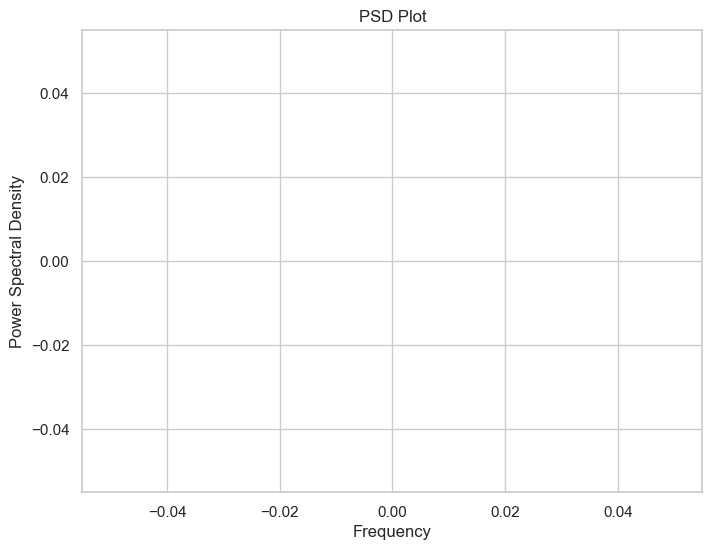

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Read PSD data from file
data = np.loadtxt("psd.txt")
freq_axis = data[:, 0]
psd = data[:, 1]

# Plot PSD
plt.figure(figsize=(8, 6))
plt.plot(freq_axis, psd)
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.title('PSD Plot')
plt.grid(True)
plt.show()